# ------------------ CFGDEGREE - AUTUMN 2022 ------------------

The project was worked on by Ingrid Ionita,  Hiu Ching (Clarissa) Lo, Michelle Obonyano and Ayomide Olarewaju.

# PART 2: DATA ANALYSIS

## 1: IMPORTING LIBRARIES

In [4]:
import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce
import math
from sklearn.cluster import KMeans

import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from geopy.point import Point
from geopy.extra.rate_limiter import RateLimiter

Once we have imported all of our necessary libraries, we will also bring in the cleaned data file.

In [ ]:
DF = pd.read_csv('cleaned_data.csv')
DF

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_2193/3299647211.py:1: DtypeWarning: Columns (0,1,29) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv('cleaned_data.csv')


,accident_index,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,junction_location,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model
0,2021010287148,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,1,...,1,1,6,1,19,4,Small Engine cc,1,3,VOLKSWAGEN GOLF
1,2021010287149,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,3,...,8,1,6,1,32,6,Large Engine cc,2,11,AUDI Q7
2,2021010287149,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,3,...,1,1,6,1,21,5,Medium Engine cc,1,11,VAUXHALL ASTRA
3,2021010287149,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,3,...,8,1,6,1,32,6,Large Engine cc,2,11,AUDI Q7
4,2021010287149,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,3,...,1,1,6,1,21,5,Medium Engine cc,1,11,VAUXHALL ASTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134209,202163DF01721,63DF01721,320842.0,311766.0,-3.172778,52.697776,63,1,3,3,...,0,2,3,1,37,7,Small Engine cc,0,-1,-1
134210,202163DF02122,63DF02122,307792.0,308034.0,-3.364790,52.662169,63,1,2,2,...,0,4,2,1,36,7,Medium Engine cc,2,13,VOLKSWAGEN GOLF
134211,202163DF02122,63DF02122,307792.0,308034.0,-3.364790,52.662169,63,1,2,2,...,0,1,6,1,28,6,Small Engine cc,0,-1,-1
134212,202163DF02122,63DF02122,307792.0,308034.0,-3.364790,52.662169,63,1,2,2,...,0,4,2,1,36,7,Medium Engine cc,2,13,VOLKSWAGEN GOLF


Then, we will examine it using .describe() and .info().

In [6]:
DF.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,...,vehicle_type,vehicle_manoeuvre,junction_location,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,propulsion_code,age_of_vehicle
count,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,...,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000
mean,449791.086451,297516.698705,-1.271294,52.567528,22.145357,2.747441,2.189824,1.772110,4.150916,4.028969,...,10.177843,17.669178,2.591250,1.970927,4.603916,1.285656,39.953522,7.085610,1.235683,5.547961
std,78858.073719,111645.545984,1.151277,1.006839,18.482155,0.479280,0.876634,1.255021,1.954982,1.453804,...,11.341189,19.885419,3.246747,1.629886,1.975671,0.451728,16.008193,2.009927,1.464078,6.298126
min,175320.000000,70163.000000,-5.265939,50.530387,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,-1.000000
25%,396206.000000,187436.250000,-2.057731,51.572492,6.000000,3.000000,2.000000,1.000000,2.000000,3.000000,...,9.000000,9.000000,0.000000,1.000000,2.000000,1.000000,28.000000,6.000000,0.000000,-1.000000
50%,438139.000000,289637.000000,-1.426368,52.500446,20.000000,3.000000,2.000000,1.000000,4.000000,3.000000,...,9.000000,18.000000,1.000000,1.000000,6.000000,1.000000,36.000000,7.000000,1.000000,4.000000
75%,522350.500000,388675.000000,-0.224963,53.392685,34.000000,3.000000,2.000000,2.000000,6.000000,6.000000,...,9.000000,18.000000,6.000000,3.000000,6.000000,2.000000,51.000000,8.000000,2.000000,10.000000
max,655140.000000,654664.000000,1.755955,55.785269,63.000000,3.000000,11.000000,22.000000,7.000000,6.000000,...,99.000000,99.000000,9.000000,9.000000,6.000000,2.000000,101.000000,12.000000,12.000000,91.000000


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134214 entries, 0 to 134213
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   accident_index                134214 non-null  object 
 1   accident_reference_x          134214 non-null  object 
 2   location_easting_osgr         134214 non-null  float64
 3   location_northing_osgr        134214 non-null  float64
 4   longitude                     134214 non-null  float64
 5   latitude                      134214 non-null  float64
 6   police_force                  134214 non-null  int64  
 7   accident_severity             134214 non-null  int64  
 8   number_of_vehicles            134214 non-null  int64  
 9   number_of_casualties          134214 non-null  int64  
 10  date                          134214 non-null  object 
 11  day_of_week                   134214 non-null  int64  
 12  time                          134214 non-nul

## 2: FINDING CORRELATIONS

We created a new variable to use for our correlation analysis, because we need to drop a few irrelevant columns for this analysis.

In [8]:
DF_CORR = DF.drop(columns=['casualty_reference', 'vehicle_reference_y', 'vehicle_reference_x', 'age_band_of_driver', 'age_band_of_casualty', 'latitude', 'longitude', 'location_easting_osgr', 'location_northing_osgr'])

Once we have the columns that we need, we plotted a heatmap using seaborn to see what variables correlate to each other. The accident severity is a variable we are interested in, and it looks like casualty severity is strongly correlated to it. Otherwise, there does not seem to be a big correlation between the other variables, which means they do not depend on each other.

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_2193/1002942163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = DF_CORR.corr().round(2)


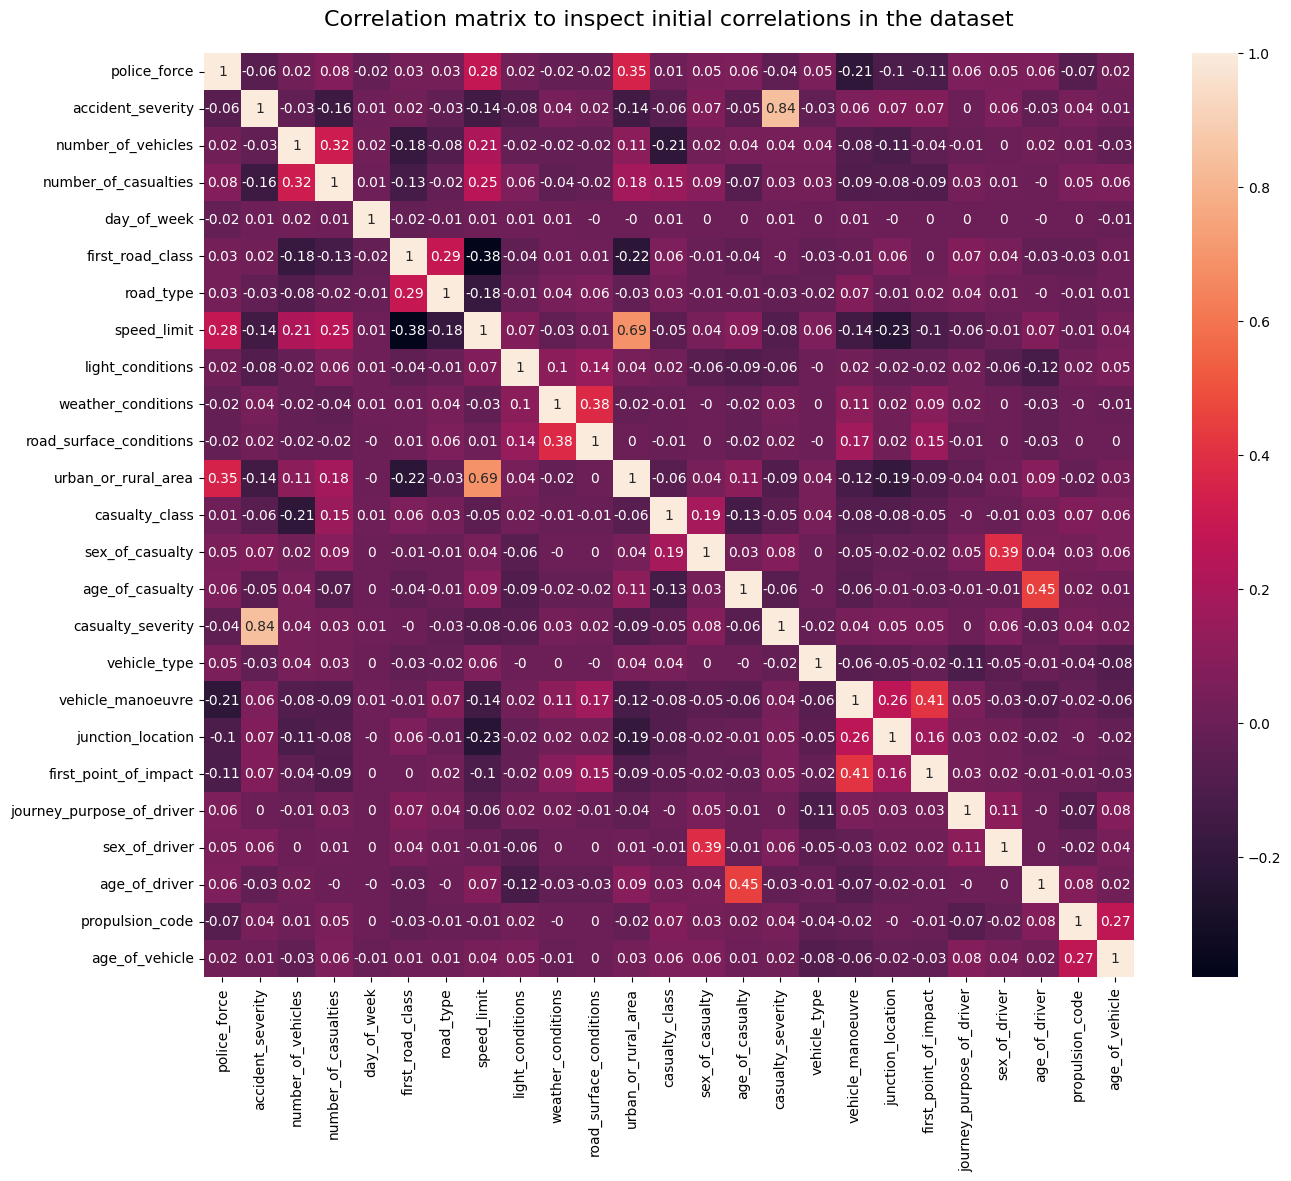

In [9]:
plt.figure(figsize = (15, 12))
correlation_matrix = DF_CORR.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"size":10})
plt.title("Correlation matrix to inspect initial correlations in the dataset", fontsize = 16, pad=20)
plt.show()

We plotted a second, more simplistic heatmap.

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_2193/1019707389.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF_CORR.corr())


<Figure size 640x480 with 0 Axes>

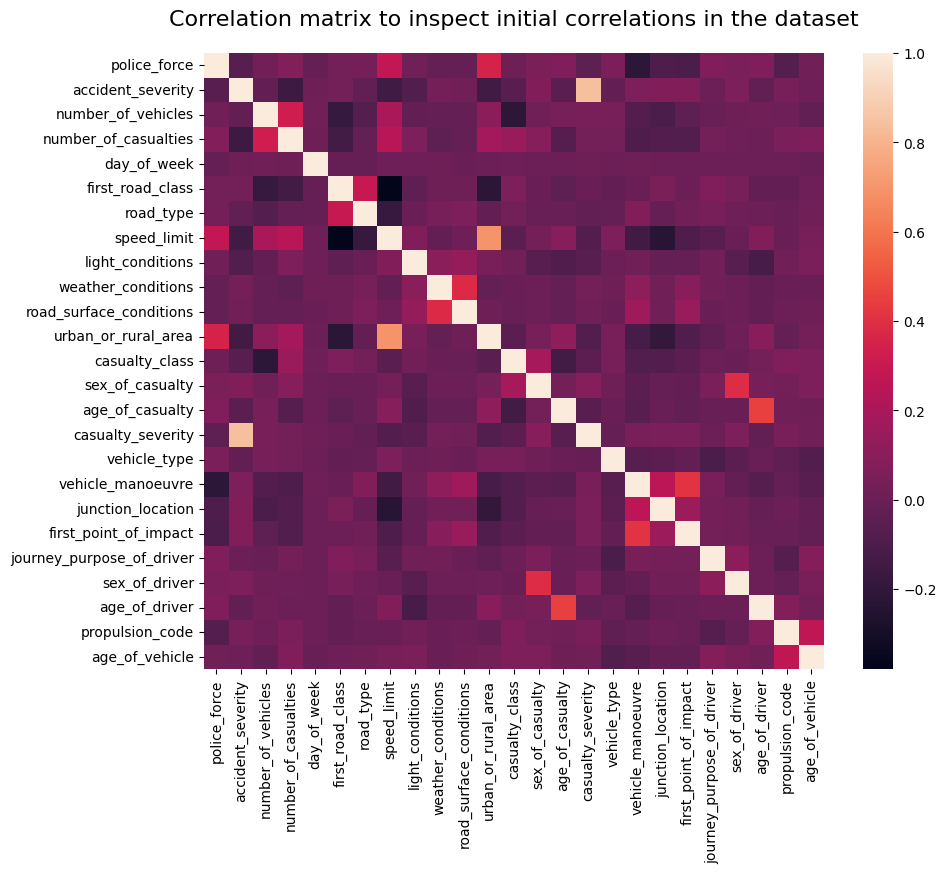

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(DF_CORR.corr())
plt.title("Correlation matrix to inspect initial correlations in the dataset", fontsize = 16, pad=20)
plt.figure()

## 3: ANALYSIS

In this section we will analyse the data that we cleaned and we will investigate what variables are more likely to lead to a traffic accident. 

### QUESTION 1: Are certain drivers more likely to get involved in a car accident compared to others?

The accident severity is the variable we are most interested in, as it denotes what the accident resulted in: fatality, serious injuries or slight injuries. We will use this variable for the most part of our analysis, because we want to see what factors go into making an accident results in a death, serious injury or slight injury. We will also compare it with external factors such as light and weather conditions to find out the factors that increase the likelihood of a traffic accident to happen.

#### What is the total count of traffic accidents by the accident severity?

In [11]:
# count of accident number by accident severity
accident_severity_counts = DF.accident_severity.value_counts()
accident_severity_counts

3    103064
2     28403
1      2747
Name: accident_severity, dtype: int64

Plotting the total count into a pie chart to better visualise the difference. 76.8% of traffic accidents in 2021 were slight, with nearly a quarter being serious. A very small percentage of traffic accidents result in death.

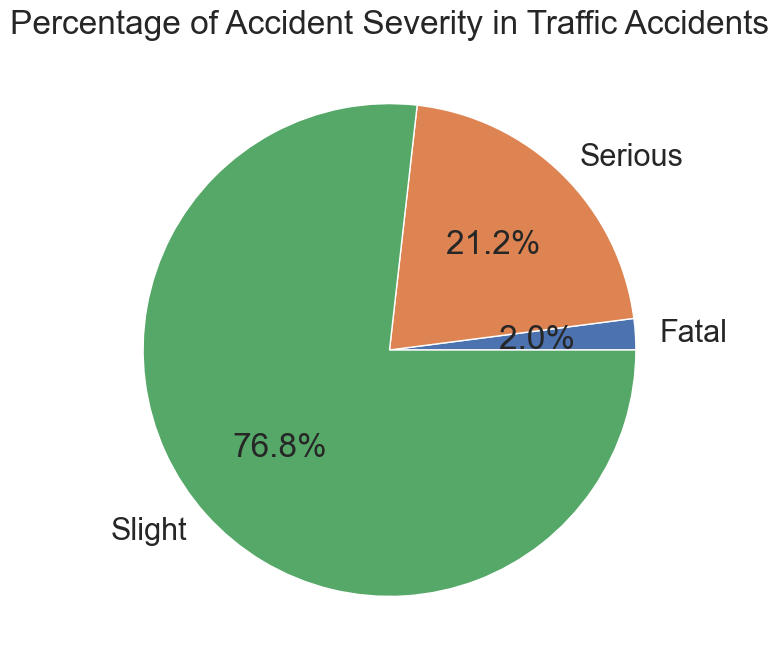

In [58]:
# Plot of accident number by accident severity

# Slices / ratio
slices = [accident_severity_counts[1],accident_severity_counts[2],accident_severity_counts[3]]

# Labels
severity = ["Fatal", "Serious", "Slight"]

# Pie
plt.pie(slices, labels = severity,autopct='%1.1f%%')

# Other elements of the pie
plt.title('Percentage of accident severity in traffic accidents')
plt.show()

#### What are the total accidents for each age band of the driver?

Whilst doing the analysis, we noticed that the total count of accidents per the age band of the driver included a variable '12'. Therefore, we decided to create a new variable that will store the dataset without the 12; we kept the dataset 'DF' as it is, because this will only impact the age band of the driver analysis.

In [13]:
DF_AB = DF[DF.age_band_of_driver !=  12] #GET BACK TO THIS, LOOK AT OTHER CELLS FOR DF_AB

In [14]:
# The count of accidents by the age band of the driver

age_band_of_driver_count = DF_AB.age_band_of_driver.value_counts().sort_index()
age_band_of_driver_count

1        20
2       250
3      1185
4      9867
5     15447
6     32558
7     24643
8     20643
9     13773
10     6374
11     3928
Name: age_band_of_driver, dtype: int64

Plotting the findings into a bar chart to better understand the difference in the total of traffic accidents that a driver may get involved in. From the chart, it is clear that 26-35 year olds are more likely to have a traffic accident. What surprised us was the low number of 16-20 and 21-25 who get into traffic accidents compared to older age bands, as we thought that younger people would be more reckless. We plotted these findings into a bar chart below.

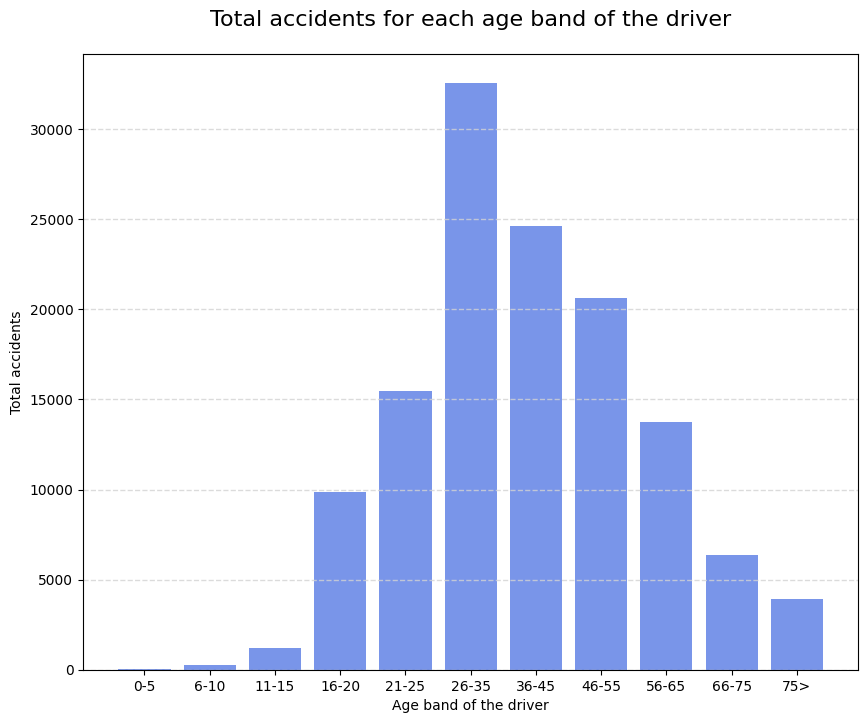

In [15]:
# Plot of age band of driver

# Figure
plt.figure(figsize=(10,8))

# Bar
age_band = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75>"]
plt.bar(age_band, age_band_of_driver_count, color='royalblue', alpha=0.7)

# X-axis
plt.xlabel('Age band of the driver')
plt.xticks(age_band)

# Y-axis
plt.ylabel('Total accidents')

# Other elements of the plot
plt.title('Total accidents for each age band of the driver', pad=20, fontsize=16)
plt.grid(color='lightgrey', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.show()

#### What are the total casualties for each age band of the casualties?

We are also interested in the age distribution of casualties. Therefore, we counted the number of casualties by the casualty age. The results shows that people aged 26-35, followed by those aged 36-45, are the most likely to be injured in traffic accidents. These results are visualised in bar charts.

In [16]:
""" there is a -1 in this, need to further clean the data INGRID: ADDED IT IN THE ROW DROP SECTION"""
# The count of the age band of the casualties

age_band_of_casualty_count = DF_AB.age_band_of_casualty.value_counts().sort_index()
age_band_of_casualty_count

-1      1251
 1      1907
 2      2929
 3      4812
 4     12605
 5     15623
 6     29131
 7     20332
 8     17872
 9     11947
 10     5919
 11     4360
Name: age_band_of_casualty, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 1 with shape (12,).

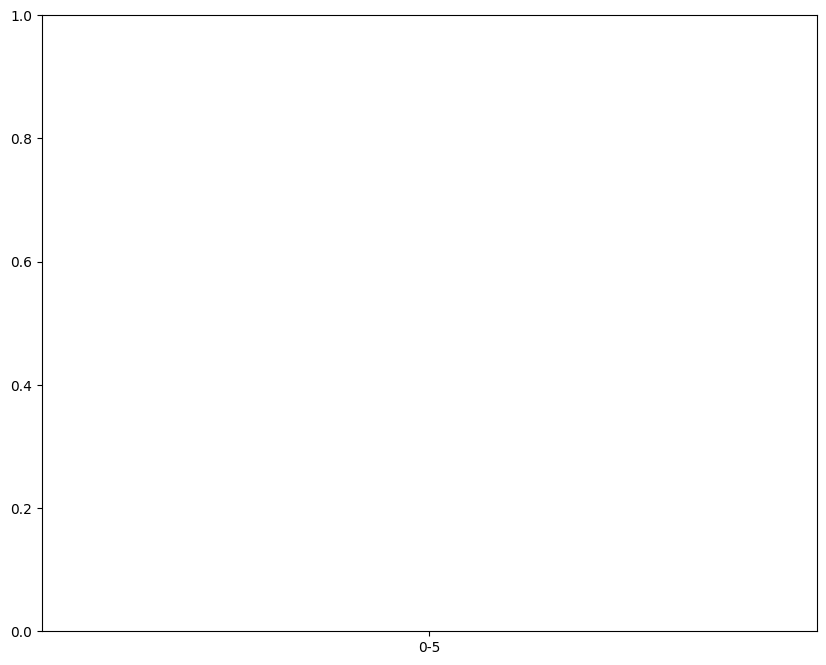

In [17]:
# age band of casualty bar chart
# figure
plt.figure(figsize=(10,8))

# bar
age_band = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75>"]
plt.bar(age_band, age_band_of_casualty_count, color='royalblue', alpha=0.7)

# x-axis
plt.xlabel('Age band of casualty')
plt.xticks(age_band)

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total casualties for each casualty age band', pad=20, fontsize=16)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.show()

#### What are the total accidents by the gender of the driver?

We are looking at the gender difference of drivers in traffic accidents, which shows that men are twice as likely to be involved in a collision.

In [19]:
# The count of drivers involved by gender
sex_of_driver_count = DF.sex_of_driver.value_counts()
sex_of_driver_count

1    95875
2    38339
Name: sex_of_driver, dtype: int64

#### What are the total casualties by gender casualty?
Males are more likely to be injured in traffic accidents. Yet, compared to the drivers' gender difference in accidents, the casualty difference of gender is not as drastic.

In [20]:
# The count of casualty by gender
sex_of_casualty_count = DF.sex_of_casualty.value_counts()
sex_of_casualty_count

1    84664
2    49550
Name: sex_of_casualty, dtype: int64

We then plotted the gender distribution of accidents and casulties in a bar chart.

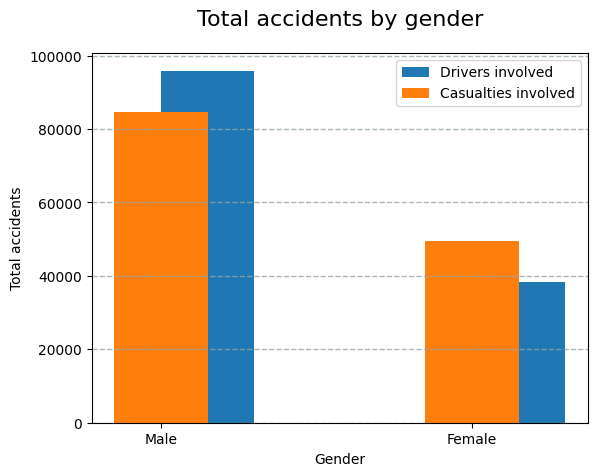

In [21]:
# visualising accidents by driver gender
plt.bar(["Male","Female"], sex_of_driver_count, align='edge', width=0.3)

# visualising casualties by casulty gender
plt.bar(["Male","Female"], sex_of_casualty_count,  width=0.3)

# x-axis
plt.xlabel('Gender')

#y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total accidents by gender', pad=20, fontsize=16)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.legend(["Drivers involved","Casualties involved"])

plt.show()

#### What are the total accidents by the age and gender of the driver?
We wanted to see whether male and female drivers would show different age distributions in total accidents. Therefore, we made a pivot table counting the total accidents according to the age of driver as index and sex of driver as columns. The data is plotted with a line graph.

In [73]:
# New data frame with information regarding the sex and age of drivers and casualties
GEN_AGE_AF = DF[['sex_of_driver','sex_of_casualty','age_of_driver', 'age_band_of_driver','age_of_casualty','age_band_of_casualty','casualty_severity']]

In [60]:
# Pivot table counting the total accidents with the age of driver as index and sex of driver as columns
PIVOT_TBL_1a = GEN_AGE_AF.pivot_table(
   index = 'age_of_driver',
   columns="sex_of_driver",
   aggfunc = "count")['casualty_severity']

PIVOT_TBL_1a

sex_of_driver,1,2
age_of_driver,,
3,5.0,NaN
4,3.0,1.0
5,8.0,3.0
6,15.0,1.0
7,19.0,13.0
...,...,...
97,6.0,NaN
98,1.0,NaN
99,3.0,1.0


Male drivers constantly cause more accidents than females. Interestingly, there is a spike of accidents during male and female drivers at the age of 34.

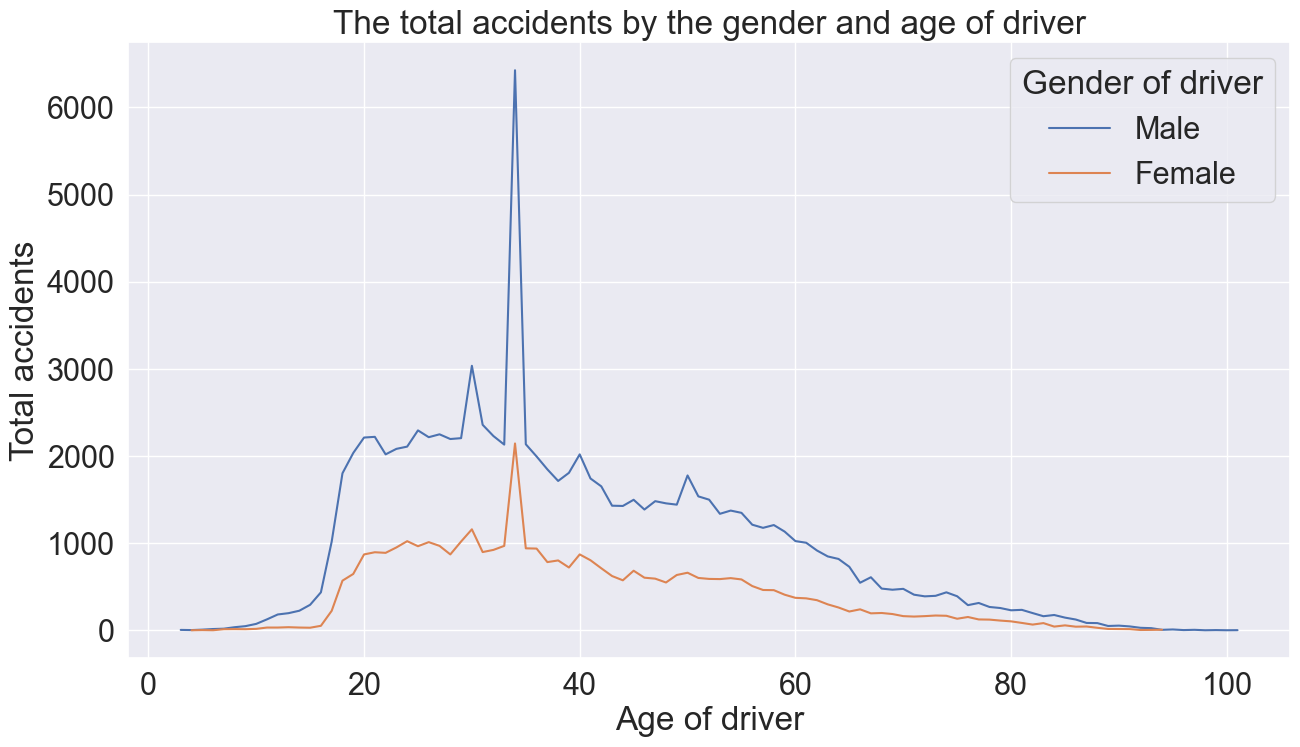

In [63]:
# Plot the total accidents by gender and age of driver
# Lines
PIVOT_TBL_1a.plot(kind="line", figsize=(15,8))

# X-axis
plt.xlabel('Age of driver')

# Y-axis
plt.ylabel('Total accidents')

# Other elements of the plot
plt.title('Total accidents by the gender and age of driver', pad=20, fontsize=16)

plt.legend(labels=["Male", "Female"], title="Gender of driver", loc="upper right")

#### What are the total casualties by the age and gender of the casualties?
We also tested whether male and female casualties would show different age distributions in total casualties. To do so, we made a pivot table counting the total casualties according to the age of casualties as index and sex of casualties as columns. The data is plotted with a line graph.

In [61]:
# pivot table counting the total casualties with age of casualties as index and sex of casualties as columns
PIVOT_TBL_1b= GEN_AGE_AF.pivot_table(
   index = 'age_of_casualty',
   columns="sex_of_casualty",
   aggfunc = "count")['casualty_severity']

PIVOT_TBL_1b

sex_of_casualty,1,2
age_of_casualty,,
-1,1378.0,847.0
0,66.0,67.0
1,138.0,117.0
2,150.0,138.0
3,200.0,183.0
...,...,...
96,4.0,4.0
97,9.0,4.0
98,1.0,3.0


Males were more likely to be involved in casualties than females, with the exception at the ages of 72 (male = 132, female = 141), 79 (male = 89, female = 113), 86 (male = 46, female = 54). The highest number of male casualties were at the age of 27 (n = 1152.0) and females at 22 years old (n = 715.0). 

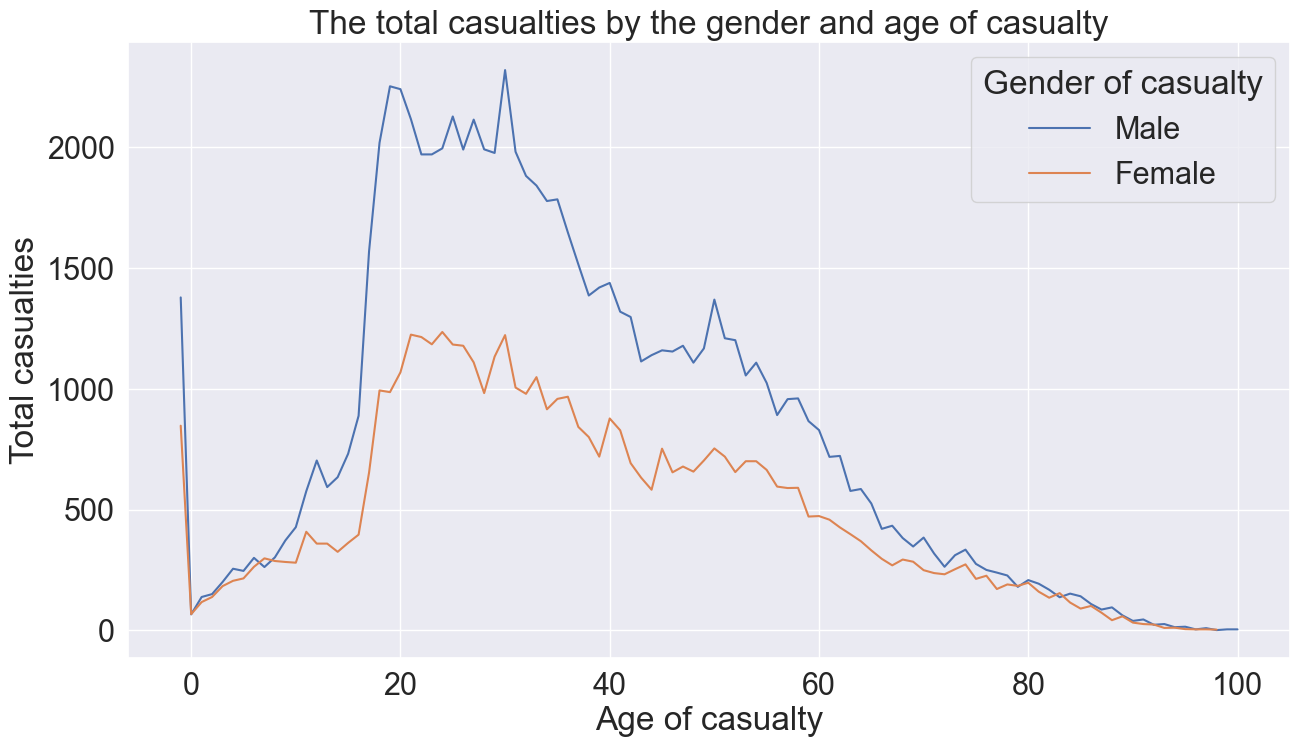

In [64]:
# Plot the total casualties by gender and age of casualties
# Lines
PIVOT_TBL_1b.plot(kind="line", figsize=(15,8))

# X-axis
plt.xlabel('Age of casualty')

# Y-axis
plt.ylabel('Total casualties')

# Other elements of the plot
plt.title('Total casualties by the gender and age of casualty', pad=20, fontsize=16)

plt.legend(labels=["Male", "Female"], title="Gender of casualty", loc="upper right")

#### What are the total accidents by casualty severity and the gender of driver?
We are also interested in whether the driver gender accident distribution would differ according to casualty severity. Similar to the above findings, the bar graph shows that more male drivers are involved in accidents, including those that caused slight, serious and fatal casualties.

In [67]:
# pivot table counting the total accidents with casualty severity as index and sex of drivers as columns
PIVOT_TBL_1c = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="sex_of_driver",
   aggfunc = "count")['age_of_driver']

PIVOT_TBL_1c

sex_of_driver,1,2
casualty_severity,,
1,1331,300
2,17037,5222
3,77507,32817


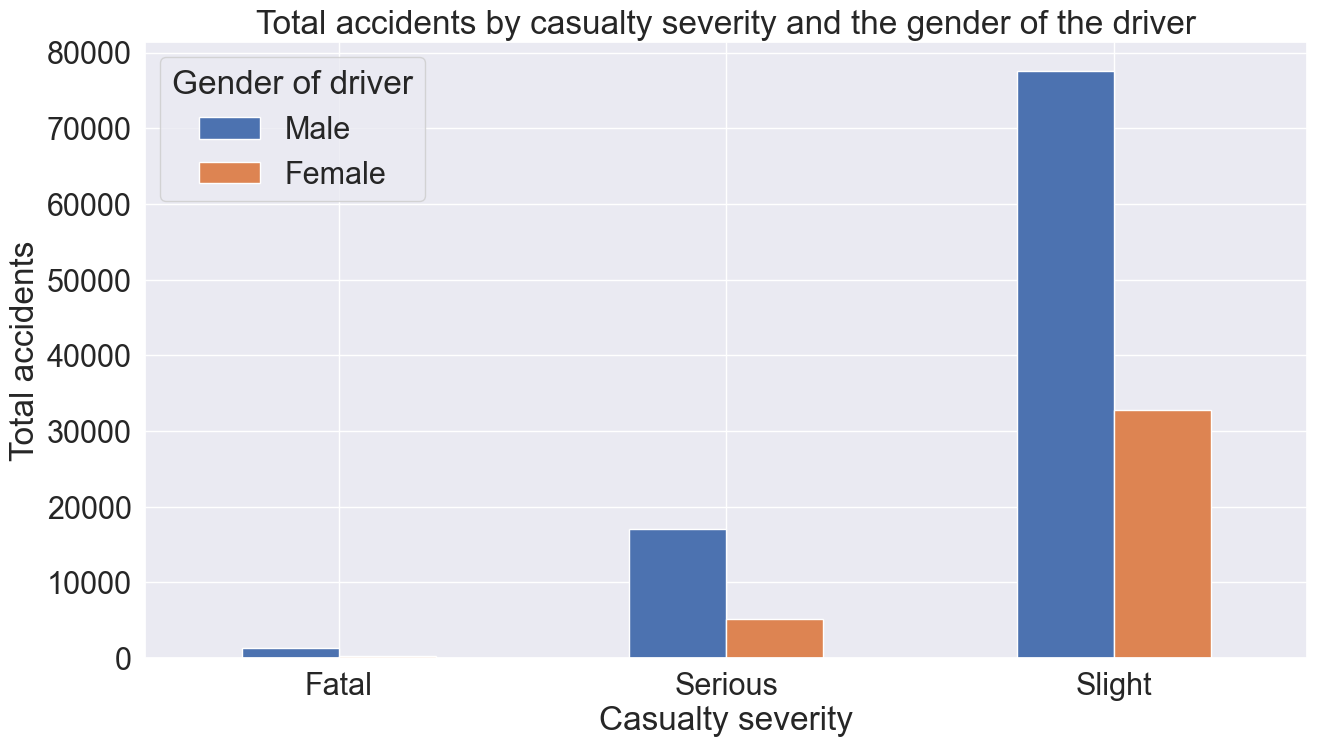

In [68]:
# plot the total accidents by casualty severity and gender of drivers
# bars
PIVOT_TBL_1c.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total accidents by casualty severity and the gender of the driver',  pad=20, fontsize=16)
plt.legend(title="Gender of driver", labels=["Male", "Female"], loc="upper left")

#### What are the total accidents by casualty severity and the age of driver?
We also looked at the drivers' age distribution based on the casualty severity and it looks like those in their mid 20s to 30s (26-35 age group) are more likely to be involved in a fatal car accident

In [69]:
# pivot table counting the total accidents with casualty severity as index and age band of drivers as columns
PIVOT_TBL_1d = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="age_band_of_driver",
   aggfunc = "count") ["sex_of_driver"]

PIVOT_TBL_1d

age_band_of_driver,1,2,3,4,5,6,7,8,9,10,11,12
casualty_severity,,,,,,,,,,,,
1,NaN,1.0,1.0,111.0,159.0,367.0,263.0,273.0,244.0,100.0,90.0,22.0
2,5.0,43.0,276.0,1870.0,2604.0,5038.0,3783.0,3517.0,2552.0,1256.0,802.0,513.0
3,15.0,206.0,908.0,7886.0,12684.0,27153.0,20597.0,16853.0,10977.0,5018.0,3036.0,4991.0


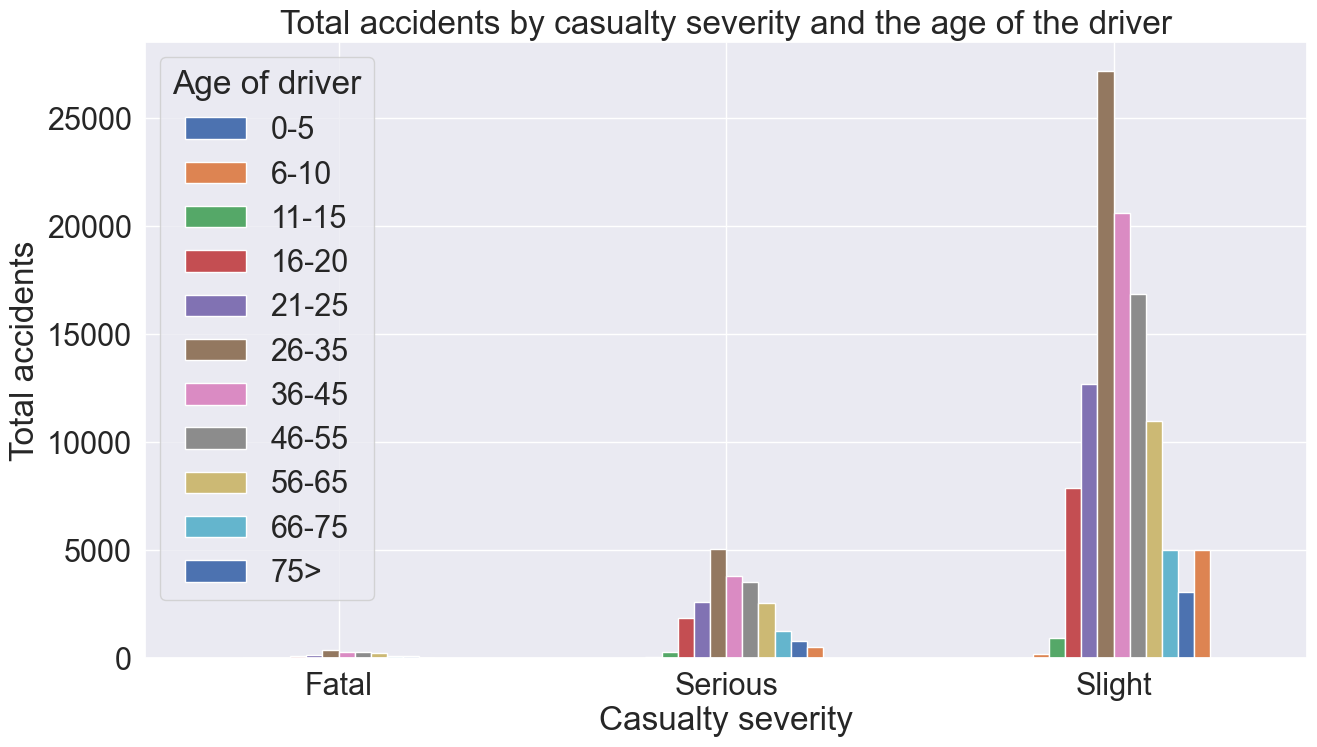

In [52]:
# Plot the total accidents by casualty severity and age of drivers
# Bars
PIVOT_TBL_1d.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total accidents by casualty severity and the age of the driver', pad=20, fontsize=16)
plt.legend(title="Age of driver", labels=age_band, loc="upper left")

#### What are the total casualties by casualty severity and the gender of casualty?

Other than drivers, we also explored the gender distribution of casualties according to casualty severity with a bar chart. Similar to the driver gender distribution, there are more male casualties across all casualty severity levels but this gender difference is less drastic than that of the drivers.

In [70]:
# pivot table counting the total casualties with  casualty severity as index and sex of casualty as columns
PIVOT_TBL_1e = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="sex_of_casualty",
   aggfunc = "count")['age_of_casualty']

PIVOT_TBL_1e

sex_of_casualty,1,2
casualty_severity,,
1,1257,374
2,15897,6362
3,67510,42814


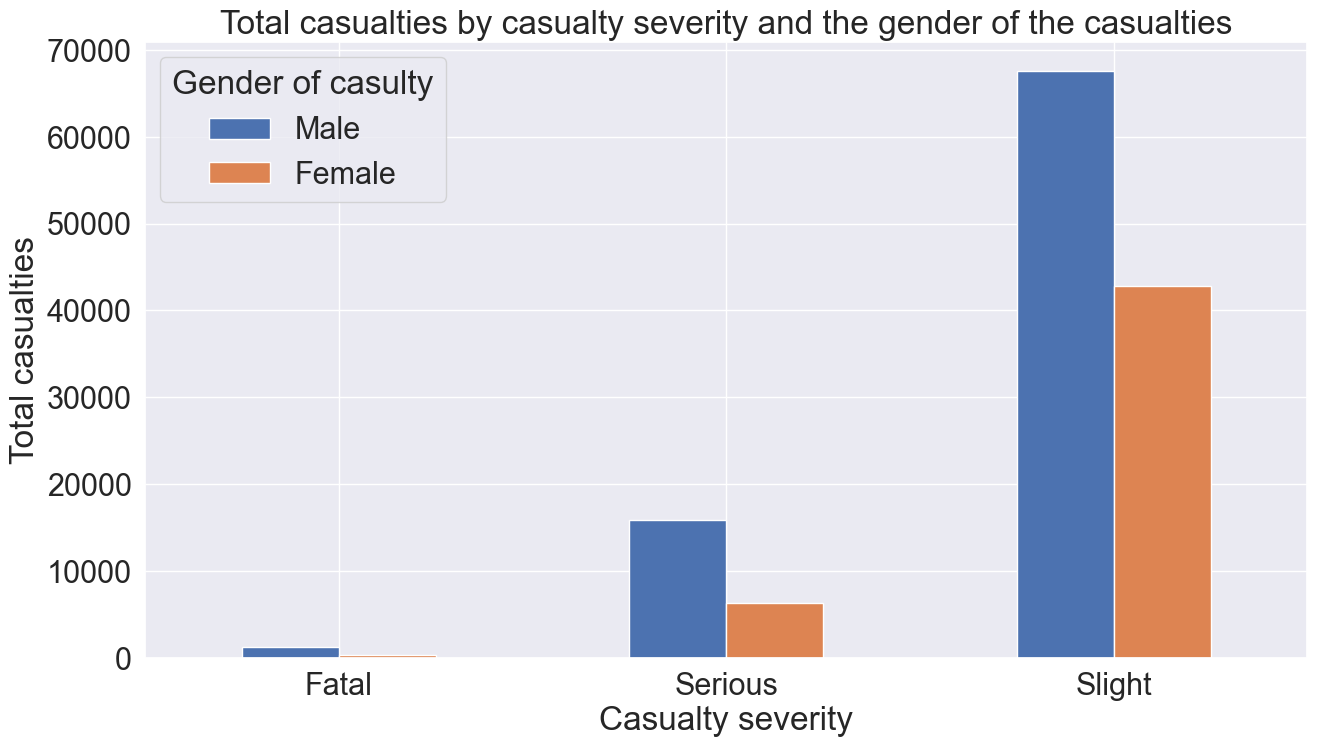

In [54]:
# plot the total casualties by casualty severity and sex of drivers
# bars
PIVOT_TBL_1e.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total casualties')

# other elements
plt.title('Total casualties by casualty severity and the gender of the casualties',  pad=20, fontsize=16)
plt.legend(title="Gender of casulty", labels=["Male", "Female"], loc="upper left")

#### What are the total casualties by casualty severity and the age of driver?

We examined the age difference of casualties according to casualty severity. Across all casualty severity levels, most casualties are aged 36-45 which differed from that of the accident distributions by driver age.

In [71]:
# pivot table counting the total casualties with casualty severity as index and age band of casualty as columns
PIVOT_TBL_1f = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="age_band_of_casualty",
   aggfunc = "count") ["sex_of_casualty"]

PIVOT_TBL_1f

age_band_of_casualty,-1,1,2,3,4,5,6,7,8,9,10,11
casualty_severity,,,,,,,,,,,,
1,NaN,12.0,11.0,6.0,148.0,152.0,295.0,197.0,231.0,228.0,154.0,197.0
2,194.0,268.0,402.0,1022.0,2486.0,2575.0,4480.0,3036.0,3083.0,2378.0,1278.0,1057.0
3,2031.0,1700.0,2661.0,4022.0,10429.0,13491.0,25408.0,17890.0,15142.0,9724.0,4634.0,3192.0


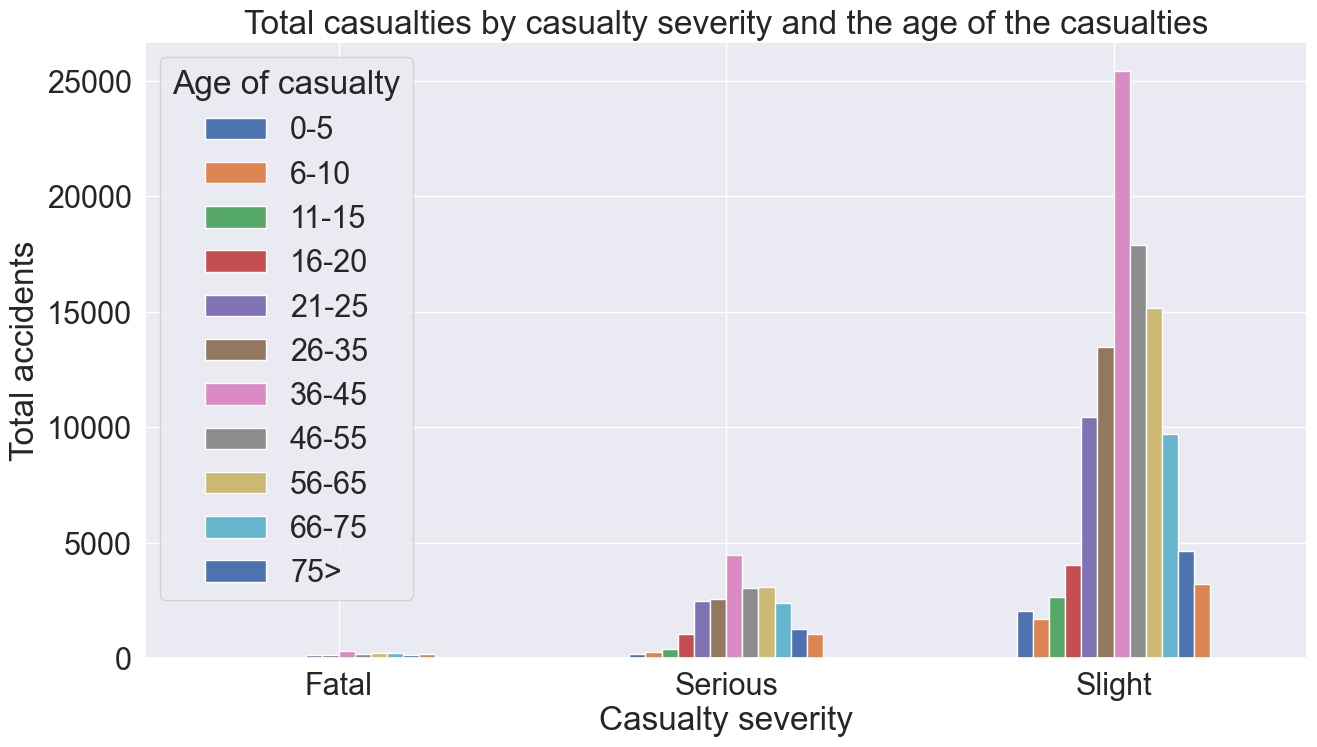

In [72]:
# plot the total casualties by casualty severity and sex of drivers
#bars
PIVOT_TBL_1f.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total casualties by casualty severity and the age of the casualties',  pad=20, fontsize=16)
plt.legend(title="Age of casualty", labels=age_band, loc="upper left")

### QUESTION 2: What times are more likely to have a higher number of traffic accidents?

We started by looking widely at the months of the year to see which one of them have a higher likelihood of a traffic accident to happen. We looked at the column 'date' and turned it into months so it is easier to see the overall for each month.

#### What is the total number of accidents for each month?

In [33]:
# The count of accidents per month
DF['month'] = pd.DatetimeIndex(DF['date']).month
month_count = DF.month.value_counts().sort_index()
month_count

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_2193/2426346256.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  DF['month'] = pd.DatetimeIndex(DF['date']).month


1      9245
2      8768
3     10149
4     12422
5     13121
6     12190
7     12661
8     12135
9     12759
10    10879
11    10351
12     9534
Name: month, dtype: int64

We then plotted our findings in a line graph; we were a little surprised, because we expected traffic accidents to happen more often in the months that have more rain and wind. From this line graph, we can see that a majority of accidents happen during spring and summer. We theorise that this is because people go out more often due to the nicer weather conditions.

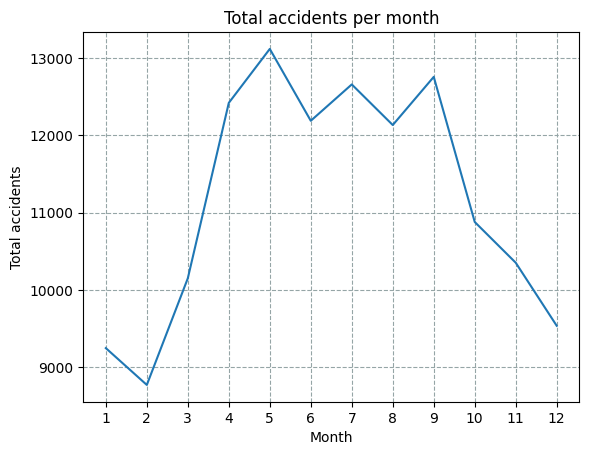

In [34]:
# Plotting the accidents per month
# line
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], month_count)

# x-axis
plt.xlabel('Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents per month',  pad=20, fontsize=16)
plt.grid(color='#95a5a6', linewidth= 0.8, linestyle="--")
plt.show()

#### What is the total number of accidents by the week day?

Then, we looked into the days. We did a value count of them to be able to plot it into a line graph.

In [35]:
# The count of accidents per day of week
day_of_week_count = DF.day_of_week.value_counts().sort_index()
day_of_week_count

1    15541
2    18471
3    18955
4    19493
5    19977
6    22533
7    19244
Name: day_of_week, dtype: int64

This line graph shows the overall increase from day-to-day of traffic accidents and Friday has the higher likelihood of a traffic accident happening. A lot more people travel during Fridays for dinner, grocery shopping, arriving home from work etc.. We speculate that is in relation with the tiredness accumulated during the week from work.

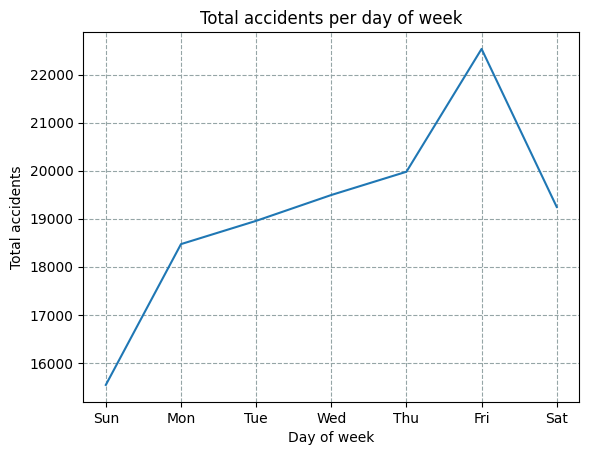

In [36]:
# Plotting the accidents per month
# line
plt.plot(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"], day_of_week_count)

# x-axis
plt.xlabel('Day of week')
plt.xticks(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents per day of week'y,  pad=20, fontsize=16)
plt.grid(color='#95a5a6', linewidth= 0.8, linestyle="--")
plt.show()

After our break-down of the days, we wanted to look even deeper to see what the data could tell us. We created a pivot table to see each day individually and how traffic accidents happened by the hour.

#### What is the total number of accidents per each hour?

In [37]:
# count the number of accidents by hour
times = pd.to_datetime(DF.time)
hours = DF.groupby([times.dt.hour]).time.count()
hours

time
0      1750
1      1279
2       817
3       717
4       702
5      1323
6      2321
7      4945
8      7424
9      5727
10     5891
11     7354
12     8453
13     8480
14     9112
15    10805
16    12040
17    11968
18     9338
19     7250
20     5447
21     4402
22     3839
23     2830
Name: time, dtype: int64

Text(0.5, 1.0, 'The total accidents at every hour in 2021')

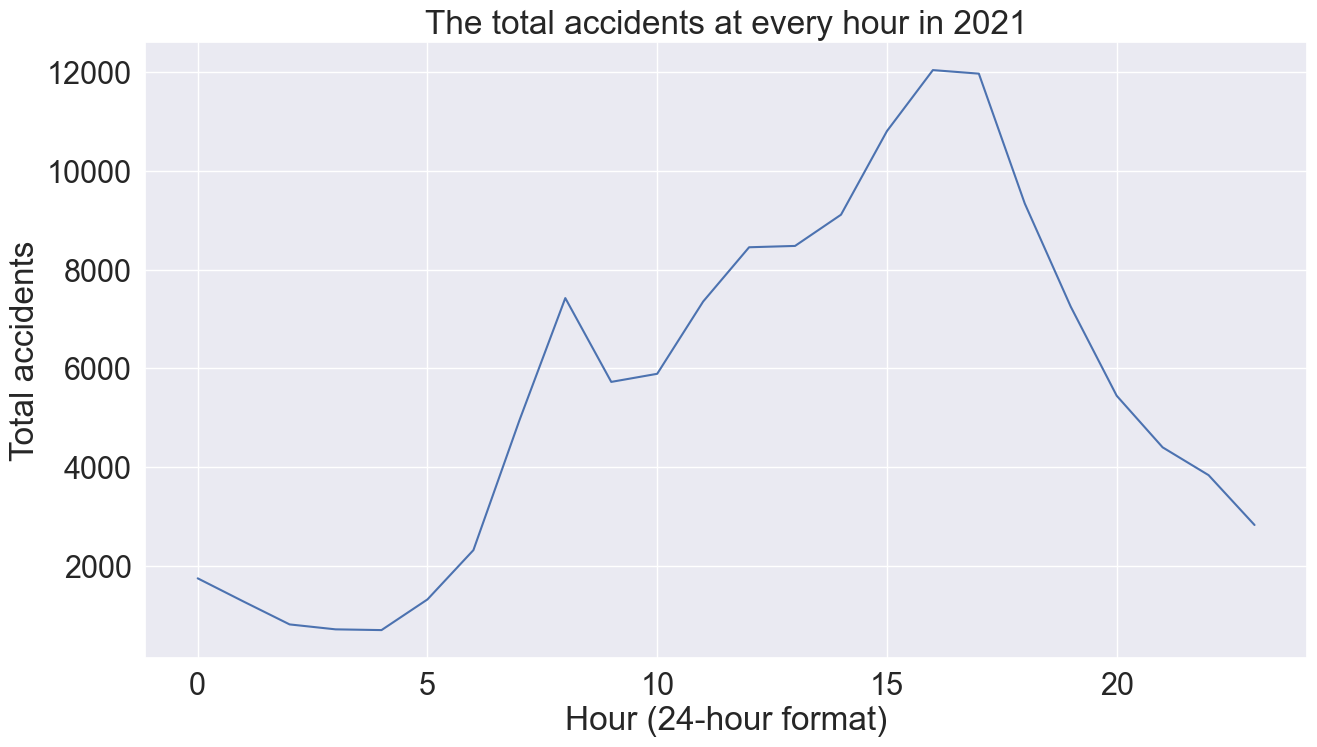

In [38]:
## plot the total accidents by hour ##

# figure size
sns.set(rc={'figure.figsize':(15, 8)}, font_scale = 2)

# line
sns.lineplot(x=range(0,24), y=hours)

# x-axis
plt.xlabel('Hour (24-hour format)')

# y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total accidents at every hour', pad=20, fontsize=16)

#### What is the total of traffic accidents per week day depending on the hour?

To analyse our dataset deeper, we decided to look into comparing the week day against the hour. The result is similar to that of an 8 to 4 or 9 to 5 working pattern, which we found interesting.

In [39]:
# convert all dates to months in DF
DF['month'] = pd.DatetimeIndex(DF['date']).month

# convert all times to hours in DF
DF['hour'] = pd.DatetimeIndex(DF['time']).hour

# preview the new columns
DF[['month','hour']]

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_2193/432761238.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  DF['month'] = pd.DatetimeIndex(DF['date']).month


,month,hour
0,1,2
1,1,3
2,1,3
3,1,3
4,1,3
...,...,...
134209,5,8
134210,12,18
134211,12,18
134212,12,18


We created a new variable to contain only the columns that we will be using for the pivot table.

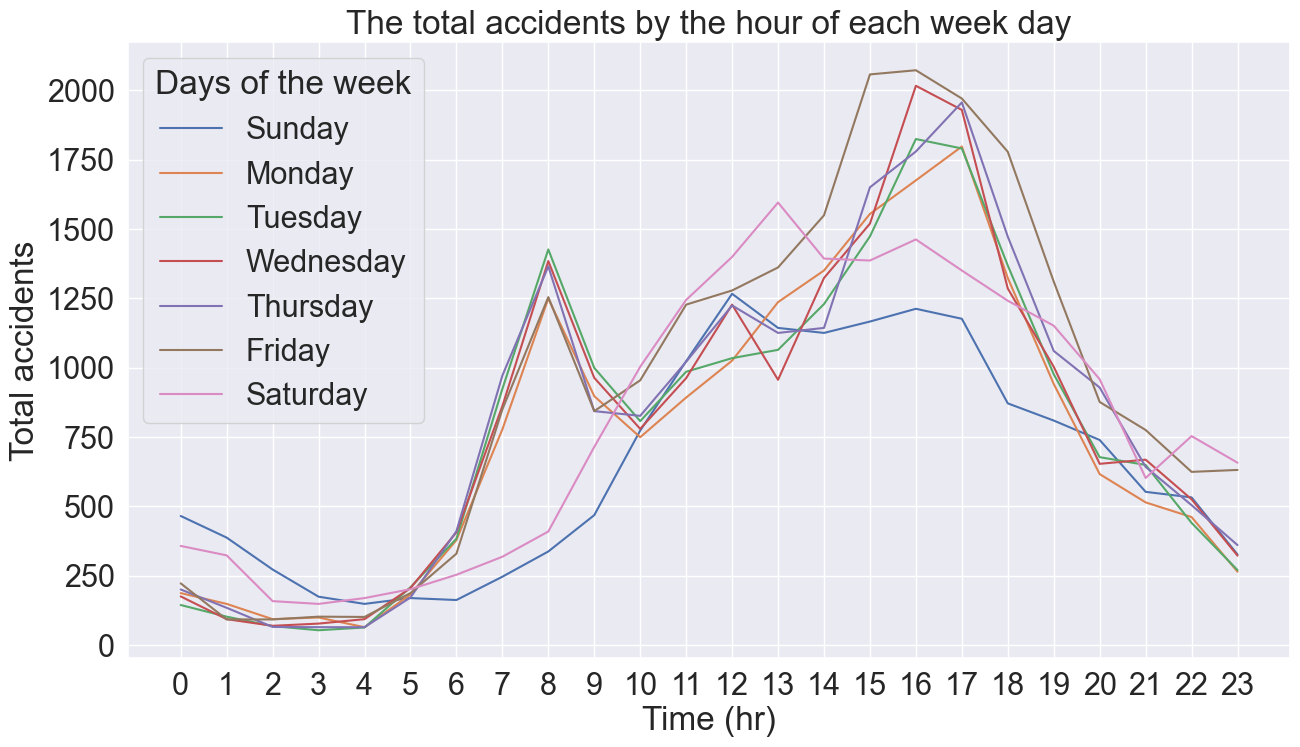

In [40]:
DAY_HOUR_MONTH_DF = DF[['day_of_week','casualty_severity', 'hour', 'month']]

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

PIVOT_TBL_2a = DAY_HOUR_MONTH_DF.pivot_table(
   index = 'hour',
   columns="day_of_week",
   aggfunc = "count")['casualty_severity']

In [ ]:
# lines
PIVOT_TBL_2a.plot(kind="line", figsize=(15,8))

# x-axis
plt.xlabel('Time (hr)')
plt.xticks(range(0, 24))

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('The total accidents by the hour of each week day', pad=20, fontsize=16)

plt.legend(labels=days, title="Days of the week", loc="upper left")

Furthermore, we compared the day against the month to see how each week day increases or decreases in the number of traffic accidents throughout the year.

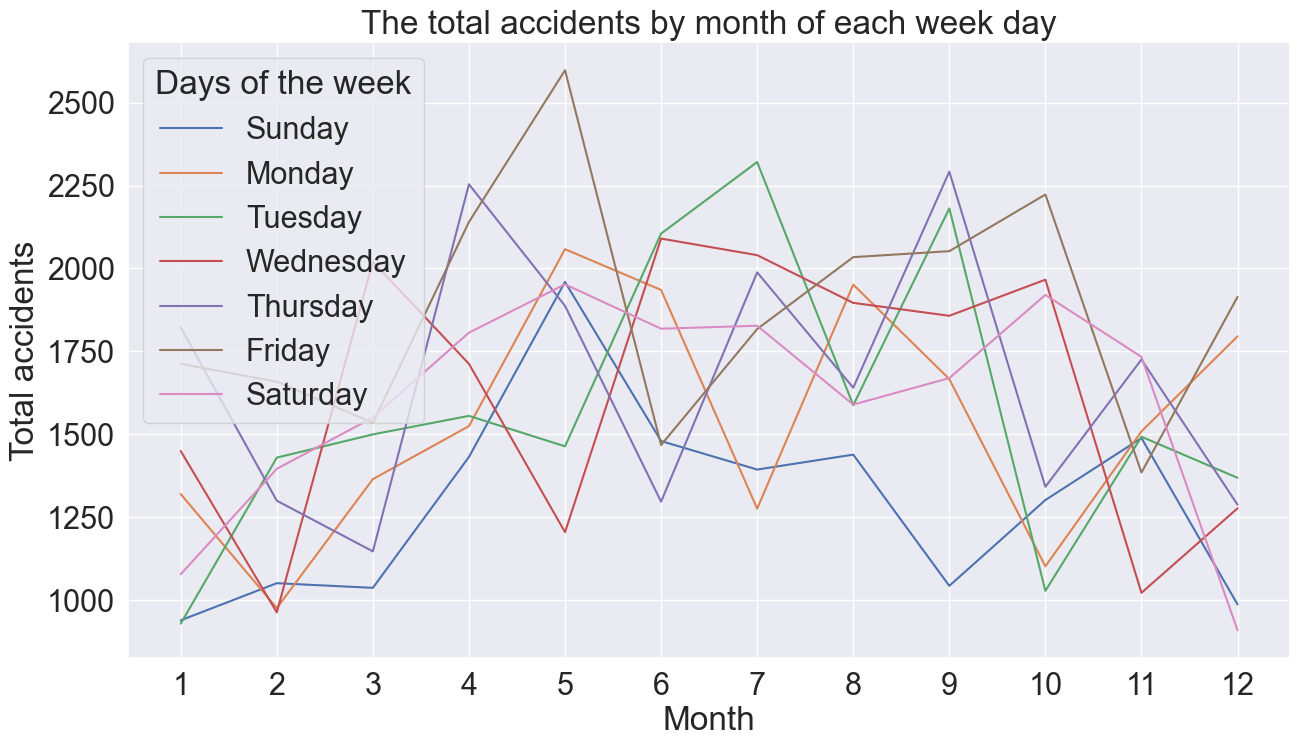

In [41]:
PIVOT_TBL_2b = DAY_HOUR_MONTH_DF.pivot_table(
   index = 'month',
   columns="day_of_week",
   aggfunc = "count")['casualty_severity']


In [ ]:
# lines
PIVOT_TBL_2b.plot(kind="line", figsize=(15,8))

# x-axis
plt.xlabel('Month')
plt.xticks(range(1, 13))

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('The total accidents by month of each week day', pad=20, fontsize=16)

plt.legend(labels=days, title="Days of the week", loc="upper left")

We then looked at the weather conditions and compared them to the hour of the day, based on the accident severity. It looks like the majority of accidents, fatal, serious and slight, happen during fine weather with no high winds. 

In [ ]:
WTHR_LIGHT = DF[['hour','accident_severity', 'weather_conditions', 'light_conditions']]

wthr_labels = ["Fine no high winds", "Raining no high winds", "Snowing no high winds", "Fine with high winds", "Raining with high winds", "Snowing with high winds", "Fog/Mist", "Other", "Unknown"]

PIVOT_TBL_2c = WTHR_LIGHT.pivot_table(
   index = 'accident_severity',
   columns= 'weather_conditions')['hour']

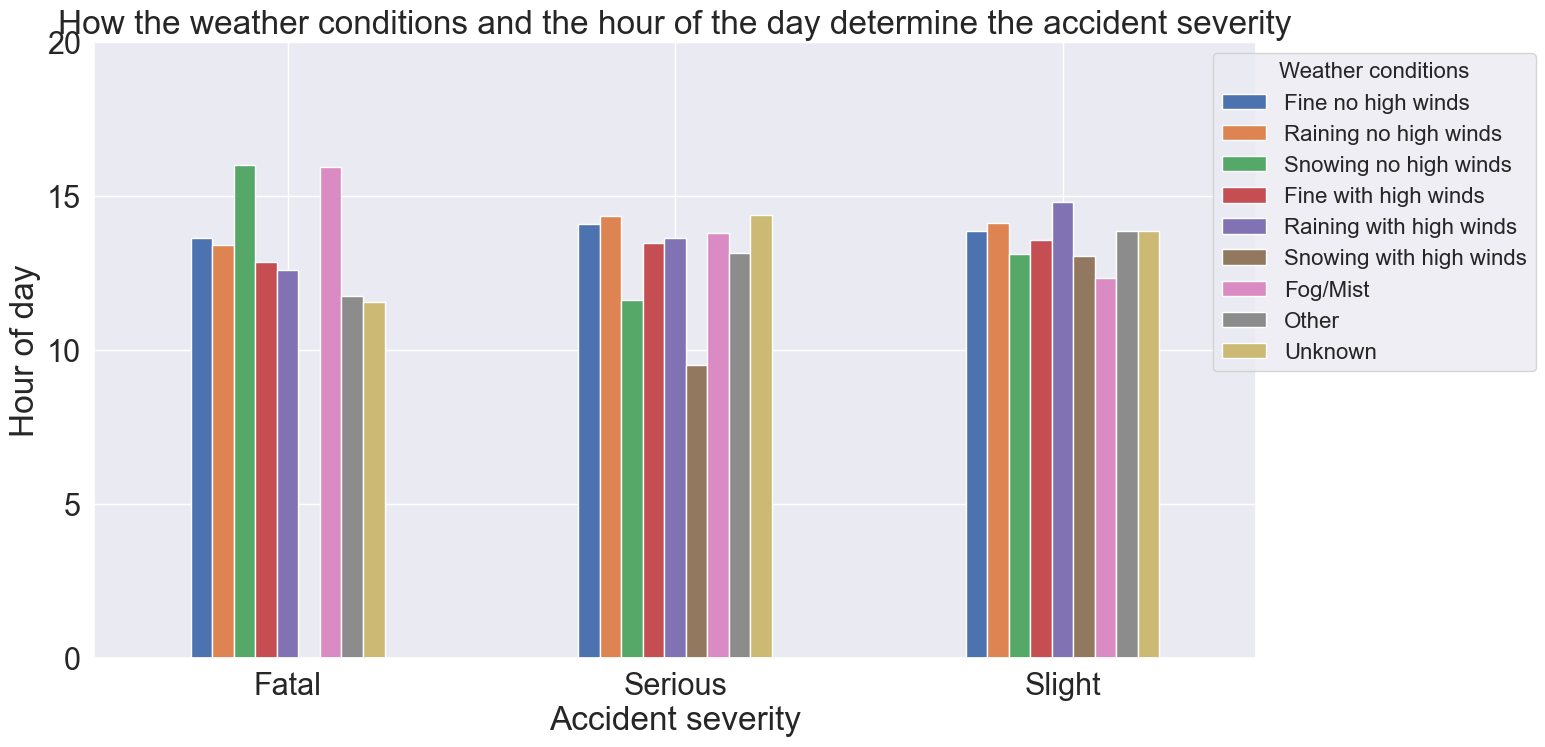

In [42]:
# Bar
PIVOT_TBL_2c.plot(kind="bar", figsize=(15,8))

#x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

#y-axis
plt.ylabel('Hour of day')
plt.yticks(range(0,24,5), rotation ='horizontal')

#other elements
plt.title('Weather conditions and the hour of the day against accident severity', pad=20, fontsize=16)
plt.legend(title="Weather conditions", title_fontsize='16', labels = wthr_labels, fontsize='16', loc="upper right", bbox_to_anchor=(1.25, 1))

We also looked at the weather conditions and the total of traffic accidents, based on the accident severity. It looks like the majority of accidents, fatal, serious and slight, happen during fine weather with no high winds again.

In [ ]:
PIVOT_TBL_2e = WTHR_LIGHT.pivot_table(
   index = 'accident_severity',
   columns="weather_conditions",
   aggfunc="count")['hour']

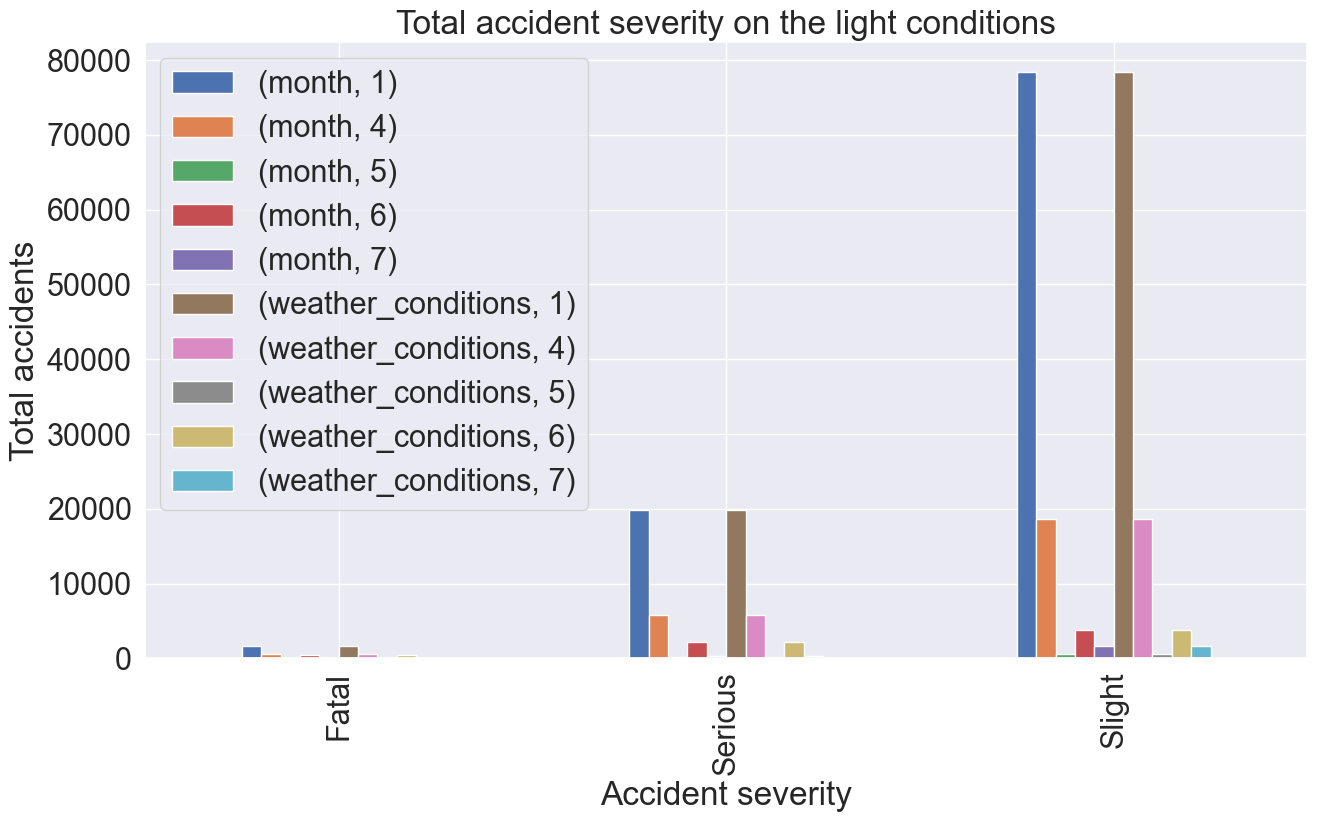

In [43]:
PIVOT_TBL_2e = WTHR_LIGHT.pivot_table(
   index = 'accident_severity',
   columns="weather_conditions",
   aggfunc="count")['hour']

# bar chart
PIVOT_TBL_2e.plot(kind="bar",figsize=(15,8))

#x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

#y-axis
plt.ylabel('Total accidents')

#other elements
plt.title('Total accident severity on the weather conditions', pad = 20, fontsize = 16)

#### What is the total number of traffic accidents based on the light conditions?

Whilst looking at the time of each traffic accident taking place, we thought that light conditions may be an important factor contributing to a traffic accident taking place.

In [ ]:
# pivot table to calculate the total accidents by light conditions and accident severity
PIVOT_TBL_2d = WTHR_LIGHT.pivot_table(
   index = 'accident_severity',
   columns="light_conditions",
   aggfunc="count")['hour']

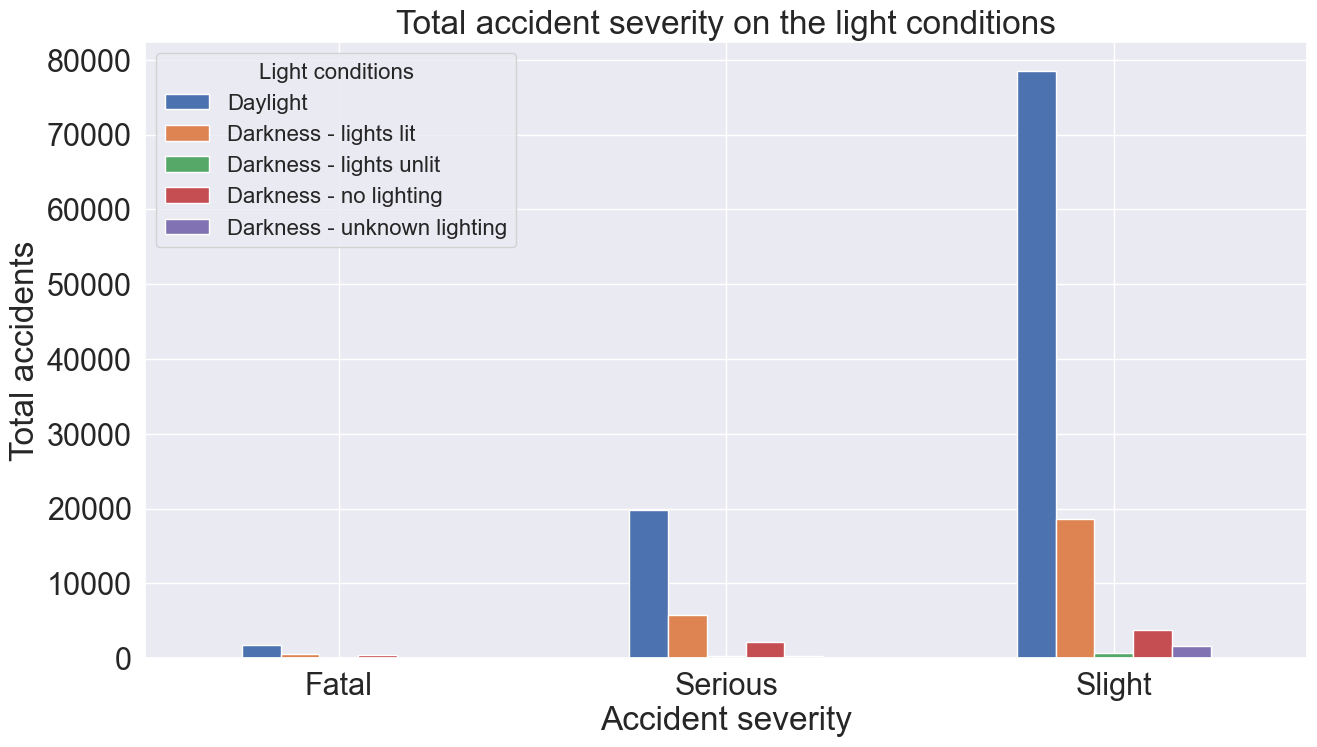

In [44]:
# bar chart
PIVOT_TBL_2d.plot(kind="bar",figsize=(15,8))

#x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

#y-axis
plt.ylabel('Total accidents')

#other elements
plt.title('Total traffic accidents based on the light conditions and severity', pad=20, fontsize=16)
light_labels = ["Daylight", "Darkness - lights lit", "Darkness - lights unlit", "Darkness - no lighting", "Darkness - unknown lighting"]
plt.legend(title="Light conditions", title_fontsize='16', labels=(light_labels), fontsize='16', loc="upper left")

### QUESTION 3: What areas in the UK are more likely to have traffic accidents?

Lastly, we decided to look at the location of the traffic accidents to see whether a higher population, like the one in the bigger cities, would be the cause of traffic accidents.

In [ ]:
JUNC_COUNTY_ROAD = DF[['junction_location','local_authority_ons_district','road_type','accident_severity']]
PIVOT_TBL_5 = JUNC_COUNTY_ROAD.pivot_table(
   index = 'accident_severity',
   columns="junction_location",
   aggfunc = "count")['local_authority_ons_district']

PIVOT_TBL_5.plot(kind="bar", figsize=(15,8))

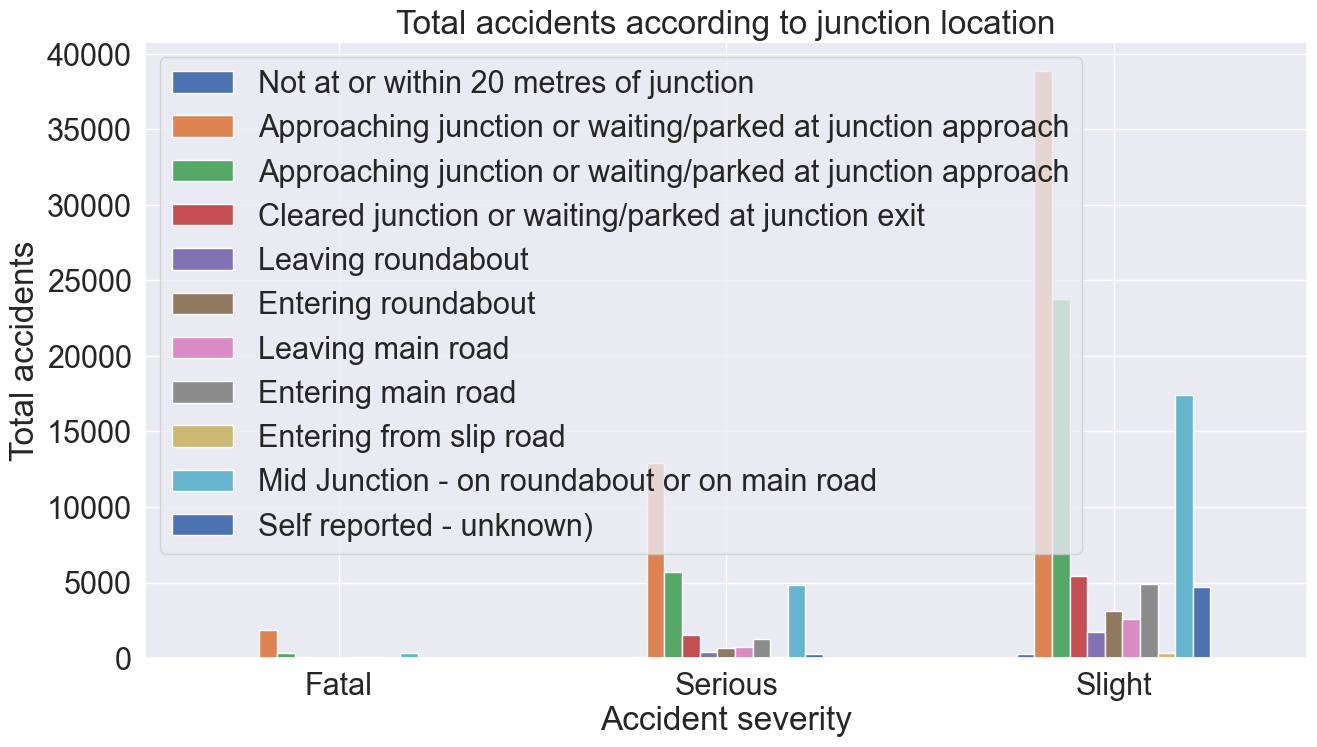

In [46]:
# Bar
PIVOT_TBL_5.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents according to junction location', pad=20, fontsize=16)

plt.legend(labels=["Not at or within 20 metres of junction", "Approaching junction or waiting/parked at junction approach", "Approaching junction or waiting/parked at junction approach", "Cleared junction or waiting/parked at junction exit", "Leaving roundabout", "Entering roundabout", "Leaving main road", "Entering main road", "Entering from slip road", "Mid Junction - on roundabout or on main road", "Self reported"], loc="upper left", fontsize=10)

We also wanted to make use of the latitude and longitude columns by mapping them on the UK map. For this we used folium and geopy.

One of the limitations of using Nominatim's API is the fact that it is unable to handle our large dataset; it can only handle 1,000 values and our dataset (after making the accident index unique) is about 14,000 rows. Therefore, we were only able to plot the fatal accidents.

To start, we will use a new variable MAP_DF to bring together the columns that we are interested in. This is because we want to make sure the API will not crash from an overload of columns.

In [48]:
MAP_DF = DF[['latitude', 'longitude', 'accident_severity', 'accident_index']]

In [49]:
MAP_DF

,latitude,longitude,accident_severity,accident_index
0,51.623425,-0.246102,3,2021010287148
1,51.509767,-0.050574,2,2021010287149
2,51.509767,-0.050574,2,2021010287149
3,51.509767,-0.050574,2,2021010287149
4,51.509767,-0.050574,2,2021010287149
...,...,...,...,...
134209,52.697776,-3.172778,1,202163DF01721
134210,52.662169,-3.364790,1,202163DF02122
134211,52.662169,-3.364790,1,202163DF02122
134212,52.662169,-3.364790,1,202163DF02122


Now we will reduce the dataset in order to be able to analyse it. Do note that although the accident index is typically not unique, that is because it accounts for one accident and each casualty it may have. So an accident may have 8 casualties, which results in 8 entries for the accident index. For this analysis, we want the index to be unique because we are only looking at the location.

In [50]:
MAP_DF = MAP_DF.drop_duplicates(['accident_index'], keep = False)

We will also look at the 'fatality' values only. This is because the Nominatim API is unable to handle more than 1,000 rows. The fatality is < 1,000!

In [51]:
dv = [2, 3]
MAP_DF = MAP_DF[NEW_DF.accident_severity.isin(dv) ==  False]

NameError: name 'NEW_DF' is not defined

Now we will import the libraries we will need for this analysis.

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")

We will also slow down the API recall for Nominatim, because it may crash otherwise.

In [ ]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1,   return_value_on_exception = None) 

We decided to test the API because we were running into trouble trying to return the city of the latitude and longitude. Running this test code will return the output 'London'! It is also the proof of the city name based on the longitude and latitude.

In [ ]:
test_geolocator = Nominatim(user_agent="https://nominatim.openstreetmap.org/search?q=<postalcodes>")

test_coordinates = "51.5211707", "-0.00835247"

test_location = test_geolocator.reverse(test_coordinates)

test_address = test_location.raw['address']

# Traverse the data
test_city = test_address.get('city', '')
test_state = test_address.get('state', '')
test_country = test_address.get('country', '')

test_city

We will create a function that we can apply to our selected dataset NEW_DF.

In [ ]:
def city_state_country(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocator.reverse(Point(coord), exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

..and then we'll apply the function! Now we have the cities of all fatal accidents and we can plot it to see the areas with the highest concentration.

In [ ]:
MAP_DF = MAP_DF.apply(city_state_country, axis=1)

We also used Folium to mark the fatal accidents from above on the map.

In [ ]:
UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 
UK

In [ ]:
for i in range(0,len(NEW_DF)):
   folium.Marker(
      location=[NEW_DF.iloc[i]['latitude'], NEW_DF.iloc[i]['longitude']],
      popup=NEW_DF.iloc[i]['city'],
   ).add_to(UK)

We also imported folium's plugin 'HeatMap' to see the concentration of accident severity: we divided these by serious, slight and fatal.

The Nominatin API is able to handle the dataset using a heatmap much better than trying to use a marker. Therefore, we used the normal dataset for this visualisation. We separated them into the three accident severity values: fatal, severe, slight. We also used different maps in new variables in order to distinguish between them. Otherwise Folium would try to plot the heatmaps into one single map, skewing our visualisation.

1. FATAL

In [ ]:
# Getting rid of the other values, slight and serious, to only keep the fatal accidents.
dv1 = [3, 2]
FATAL = NEW_DF[DF.accident_severity.isin(dv1) ==  False]

In [ ]:
# Creating a new map variable for the fatalities.
FATAL_UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 

In [ ]:
# Using the lambda function to combine the latitude and longitude into one column.
fatal_latlon = FATAL.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

In [ ]:
#Plotting the latitude and longitude on the map.
HeatMap(fatal_latlon).add_to(FATAL_UK)

In [ ]:
# Calling the map to see the visualisation.
FATAL_UK

2. SERIOUS

In [ ]:
# Getting rid of the other values, slight and fatal, to only keep the fatal accidents.
dv2 = [3, 1]
SERIOUS = NEW_DF[DF.accident_severity.isin(dv2) ==  False]

In [ ]:
# Creating a new map variable for the serious accidents.
SERIOUS_UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 

In [ ]:
# Using the lambda function to combine the latitude and longitude into one column.
serious_latlon = SERIOUS.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

In [ ]:
#Plotting the latitude and longitude on the map.
HeatMap(serious_latlon).add_to(SERIOUS_UK)

In [ ]:
# Calling the map to see the visualisation.
SERIOUS_UK

3. SLIGHT

In [ ]:
# Getting rid of the other values, fatal and serious, to only keep the fatal accidents.
dv3 = [1, 2]
SLIGHT = NEW_DF[DF.accident_severity.isin(dv3) ==  False]

In [ ]:
# Creating a new map variable for the serious accidents.
SLIGHT_UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 

In [ ]:
# Using the lambda function to combine the latitude and longitude into one column.
slight_latlon = SLIGHT.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

In [ ]:
#Plotting the latitude and longitude on the map.
HeatMap(slight_latlon).add_to(SLIGHT_UK)

In [ ]:
# Calling the map to see the visualisation.
SLIGHT_UK

#### What is the distribution of traffic accidents by the location?

This scatter plot shows the UK map with the distribution of traffic accidents; the darker the area becomes, the higher the volume of traffic accidents it represents.

In [ ]:
data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.5,
             s = data["number_of_casualties"]/100, label = "number_of_casualties", figsize=(15,15),
             c = "accident_severity", cmap ='turbo', colorbar= True)
plt.legend()
plt.grid()
plt.title('Determining areas that has the most number of accidents', fontsize=10)

#### What is the specific location that has the most traffic accidents?

The below graps shows the cluster of traffic accidents in the UK based on the latitude and longitude. The areas with most number of acidents centers around longitude -1 and +1, but what this visualisation does not show is the actual city name which is important in our findings. Using the test code to show that the API works, we can also discover the city name based on the latitude and longitude.

In [ ]:
x=df.loc[:, ['latitude', 'longitude']]
kmeans = KMeans(n_clusters=30)
kmeans = kmeans.fit(x)
labels = kmeans.labels_
df['cluster'] = labels
plt.scatter(x['latitude'], x['longitude'], s=50, c=labels, marker='.',\
            cmap=plt.cm.get_cmap('jet', 30))
plt.colorbar()
plt.show()

#plt.title('Determining Location that has the most Number of Accidents')
centers = kmeans.cluster_centers_
counts = np.bincount(labels)
result = np.where(counts == np.amax(counts))
result = result[0]
print(result)
most_accidents = centers[result]
f = result.item(0) # get the int of the cluster number
print(centers[f])
print(counts, f) 

#### What is the relationship between the type of junction location and the accident severity?

We also did a heatmap plot to show how junction locations impact accident severity. As shown in the figure below, while junction location 0-9 has quite a high level of impact on accident severity, there is a higher level of impact on accident severity with the addition of junction location 10 (i.e., 0-10).


In [ ]:
x=NEW_DF['junction_location']
y=NEW_DF['accident_severity']

In [ ]:
#DEFINE GRID SIZE AND RADIUS(h)
grid_size=1
h=10

#GETTING X,Y MIN AND MAX
x_min=min(x)
x_max=max(x)
y_min=min(y)
y_max=max(y)

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)


In [ ]:
#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

In [ ]:
#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

In [ ]:
#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

In [ ]:
#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(x , y ,'ro')
plt.colorbar()
plt.show()
plt.title('Determining which junction location caused most accident severity')
plt.xlabel('junction location')
plt.ylabel('accident severity')